In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cf = pd.read_csv("../datasets/codeforces.csv")
lc = pd.read_csv("../datasets/leetcode.csv")

In [4]:
cf.drop("Unnamed: 0", axis=1, inplace=True)
lc.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
cf_tag_dict = {
    "avg_num_tags" : 0,
    "max_tag" : 0,
    "min_tag" : float("inf"),
    "avg_num_words" : 0
}
for i in range(cf.shape[0]):
    n = len(cf.iloc[i, 2].split(","))
    cf_tag_dict["avg_num_tags"] += n
    cf_tag_dict["max_tag"] = max(cf_tag_dict["max_tag"], n)
    cf_tag_dict["min_tag"] = min(cf_tag_dict["min_tag"], n)
    cf_tag_dict["avg_num_words"] += len(cf.iloc[i, 0].split(" "))

cf_tag_dict["avg_num_tags"] = round(cf_tag_dict["avg_num_tags"]/cf.shape[0],2)
cf_tag_dict["avg_num_words"] = round(cf_tag_dict["avg_num_words"]/cf.shape[0],2)
 
lc_tag_dict = {
    "avg_num_tags" : 0,
    "max_tag" : 0,
    "min_tag" : float("inf"),
    "avg_num_words" : 0
}
for i in range(lc.shape[0]):
    n = len(lc.iloc[i, 2].split(","))
    lc_tag_dict["avg_num_tags"] += n
    lc_tag_dict["max_tag"] = max(lc_tag_dict["max_tag"], n)
    lc_tag_dict["min_tag"] = min(lc_tag_dict["min_tag"], n)
    lc_tag_dict["avg_num_words"] += len(lc.iloc[i, 0].split(" "))

lc_tag_dict["avg_num_tags"] = round(lc_tag_dict["avg_num_tags"]/lc.shape[0],2)
lc_tag_dict["avg_num_words"] = round(lc_tag_dict["avg_num_words"]/lc.shape[0],2)

pd.DataFrame(data=[cf_tag_dict, lc_tag_dict], index=["Codeforces", "Leetcode"])

,avg_num_tags,max_tag,min_tag,avg_num_words
Codeforces,2.74,11,1,169.33
Leetcode,3.01,11,1,90.50


In [6]:
cf.iloc[0, 2].split("'")

['[',
 'data structures',
 ', ',
 'dfs and similar',
 ', ',
 'divide and conquer',
 ', ',
 'dp',
 ', ',
 'math',
 ', ',
 'trees',
 ']']

In [7]:
i = random.randint(0, cf.shape[0])
cf.iloc[i, 2].split("'"), cf.iloc[i, 2].split("'")[1::2]

(['[',
  'constructive algorithms',
  ', ',
  'dfs and similar',
  ', ',
  'graphs',
  ', ',
  'greedy',
  ']'],
 ['constructive algorithms', 'dfs and similar', 'graphs', 'greedy'])

In [8]:
i = random.randint(0, lc.shape[0])
lc.iloc[i, 2].split("'"), lc.iloc[i, 2].split("'")[1::2]

(['[',
  'array',
  ', ',
  'math',
  ', ',
  'dynamic-programming',
  ', ',
  'sorting',
  ']'],
 ['array', 'math', 'dynamic-programming', 'sorting'])

In [9]:
cf["website"] = "codeforces"
lc["website"] = "leetcode"

df = pd.concat([cf, lc], axis=0, ignore_index=True)

In [10]:
df["num_words"] = df["question_text"].str.split(" ").apply(len)

In [11]:
df.head()

,question_text,input_outputs,tags,website,num_words
0,This is the hard version of the problem. The o...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,"['data structures', 'dfs and similar', 'divide...",codeforces,319
1,This is the simple version of the problem. The...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,"['data structures', 'dfs and similar', 'dp', '...",codeforces,316
2,You are given an array a consisting of n zeros...,Input: ['65 51 24 51 51 32 45531244 21 14 4223...,"['binary search', 'brute force', 'data structu...",codeforces,182
3,Timofey has an apple tree growing in his garde...,Input: ['251 23 45 33 243 45 14 41 331 21 331 ...,"['combinatorics', 'dfs and similar', 'dp', 'ma...",codeforces,243
4,Vanya really likes math. One day when he was s...,Input: ['63103711000000000000000015'] Output:[...,"['bitmasks', 'combinatorics', 'math', 'trees']",codeforces,167


In [12]:
for i in range(7):
    df[f"tag_{i+1}"] = pd.NA

df["num_tags"] = 0

for i in range(df.shape[0]):
    tags = df.iloc[i, 2]
    tags = tags.split("'")[1::2]
    n = 0
    for j, tag in enumerate(tags[:7]):
        if tag is not pd.NA:
            n += 1
        df.iloc[i, j+5] = tag
    df.iat[i, -1] = n  

df.head()

,question_text,input_outputs,tags,website,num_words,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,num_tags
0,This is the hard version of the problem. The o...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,"['data structures', 'dfs and similar', 'divide...",codeforces,319,data structures,dfs and similar,divide and conquer,dp,math,trees,<NA>,6
1,This is the simple version of the problem. The...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,"['data structures', 'dfs and similar', 'dp', '...",codeforces,316,data structures,dfs and similar,dp,graphs,greedy,math,trees,7
2,You are given an array a consisting of n zeros...,Input: ['65 51 24 51 51 32 45531244 21 14 4223...,"['binary search', 'brute force', 'data structu...",codeforces,182,binary search,brute force,data structures,two pointers,<NA>,<NA>,<NA>,4
3,Timofey has an apple tree growing in his garde...,Input: ['251 23 45 33 243 45 14 41 331 21 331 ...,"['combinatorics', 'dfs and similar', 'dp', 'ma...",codeforces,243,combinatorics,dfs and similar,dp,math,trees,<NA>,<NA>,5
4,Vanya really likes math. One day when he was s...,Input: ['63103711000000000000000015'] Output:[...,"['bitmasks', 'combinatorics', 'math', 'trees']",codeforces,167,bitmasks,combinatorics,math,trees,<NA>,<NA>,<NA>,4


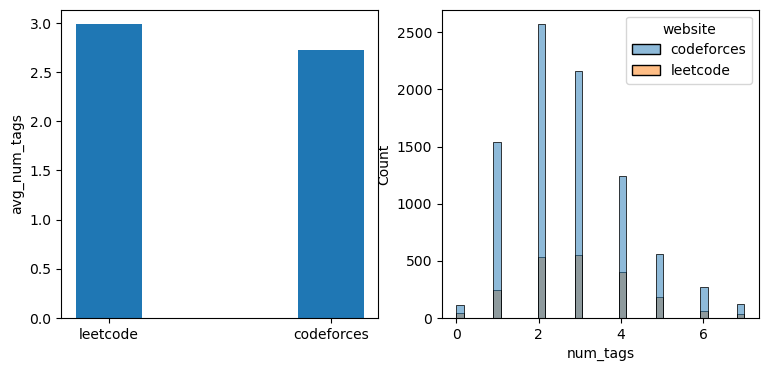

In [13]:
avg_tags_lc = df[df["website"]=="leetcode"]["num_tags"].mean()
avg_tags_cf = df[df["website"]=="codeforces"]["num_tags"].mean()

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.bar(x=[0,1], height=[avg_tags_lc, avg_tags_cf], width=0.3)
plt.xticks(range(2), ["leetcode", "codeforces"])
plt.ylabel("avg_num_tags");
plt.subplot(122)
sns.histplot(x=df["num_tags"], hue=df["website"]);

In [14]:
df.drop("tags", axis=1, inplace=True)

In [39]:
df.to_csv("../datasets/CPT.csv")

## Grouping the tags

`tag_1` and `tag_2`-> consists of the data structure tags <br>
`tag_3` and `tag_4` -> consists of the algorithm tags

**Data structure tags**
* string
* graph (eulerian circuit)
* array - (matrices, matrix)
* tree
* stack
* trie
* linked list
* set - (dsu)
* queue

**Algorithm tags**
* Search - (binary search)
* Math - (combinatorics)
* Divide and Conquer

In [21]:
df["tag_1"].unique()

array(['data structures', 'binary search', 'combinatorics', 'bitmasks',
       'greedy', 'divide and conquer', '2-sat', 'dfs and similar',
       'constructive algorithms', 'dp', 'games', 'geometry',
       'brute force', 'implementation', 'strings', 'math', 'interactive',
       'string suffix structures', <NA>, 'graphs', 'two pointers',
       '*special problem', 'flows', 'graph matchings', 'hashing', 'fft',
       'dsu', 'sortings', 'chinese remainder theorem',
       'meet-in-the-middle', 'matrices', 'number theory', 'trees',
       'expression parsing', 'probabilities', 'ternary search',
       'shortest paths', 'string', 'dynamic-programming', 'array',
       'linked-list', 'tree', 'hash-table', 'backtracking',
       'two-pointers', 'database', 'depth-first-search', 'stack',
       'signup', 'graph', 'bit-manipulation', 'binary-search',
       'divide-and-conquer', 'shell', 'breadth-first-search', 'design',
       'concurrency', 'union-find', 'percentage-of-letter-in-string',
  